## 使用するライブラリとデータセットの読み込み

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.misc import toimage
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.datasets import cifar10

## KerasのサンプルデータセットのMNISTのデータ読み込み

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

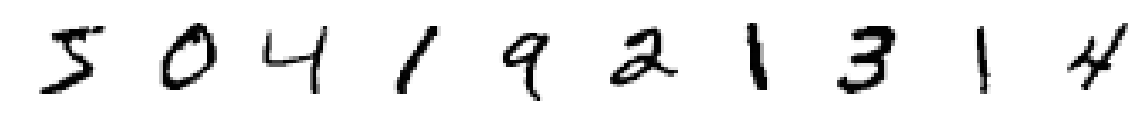

In [7]:
def print_mnist_image(data):
  fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
  for i in range(10):
    image = data[i]
    two_d = (np.reshape(image, (28, 28)) * 255).astype(np.uint8)
    subplts[i].axis('off')
    subplts[i].imshow(two_d, interpolation='nearest')
  
print_mnist_image(X_train)

In [8]:
y_train[1]

0

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)

In [10]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
Y_test = np_utils.to_categorical(y_test, 10)


## Kerasでパーセプトロンの実装とMNISTのテスト

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam

In [0]:
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

In [0]:
def test_mnist():
    test_num = 10
    start = np.random.randint(X_test.shape[0] - test_num)
    x_test = X_test[start:start+test_num]
    y_test = Y_test[start:start+test_num]

    fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
    for i in range(10):
        image = x_test[i]
        two_d = (np.reshape(image, (28, 28)) * 255).astype(np.uint8)
        subplts[i].axis('off')
        subplts[i].imshow(two_d, interpolation='nearest')

    print(np.argmax(y_test, axis=1))

    preds = model.predict(x_test.reshape(test_num,784))
    print(np.argmax(preds, axis=1))

In [0]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train.reshape(60000, 784), Y_train,
                    validation_data=(X_test.reshape(10000, 784), Y_test),
                    batch_size=10, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 26s 426us/step - loss: 0.0806 - acc: 0.5240 - val_loss: 0.0608 - val_acc: 0.6825
Epoch 2/5
60000/60000 [==============================] - 23s 387us/step - loss: 0.0541 - acc: 0.7399 - val_loss: 0.0476 - val_acc: 0.7969
Epoch 3/5
60000/60000 [==============================] - 23s 389us/step - loss: 0.0449 - acc: 0.8118 - val_loss: 0.0411 - val_acc: 0.8325
Epoch 4/5
60000/60000 [==============================] - 24s 401us/step - loss: 0.0399 - acc: 0.8328 - val_loss: 0.0372 - val_acc: 0.8466
Epoch 5/5
60000/60000 [==============================] - 23s 386us/step - loss: 0.0367 - acc: 0.8440 - val_loss: 0.0346 - val_acc: 0.8563


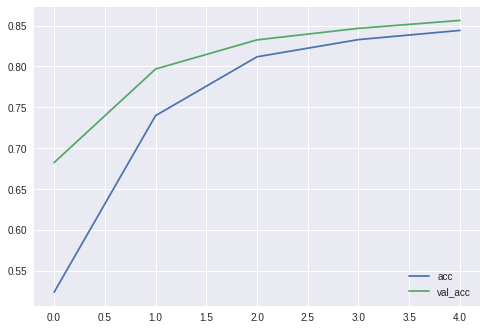

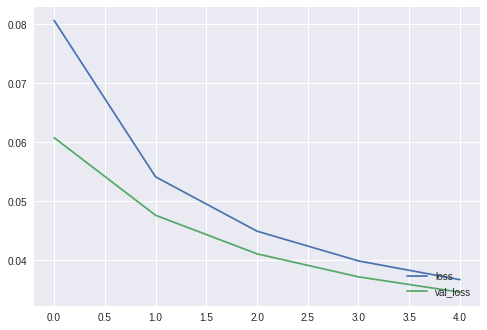

In [19]:
plot_history(history)

[5 6 7 4 7 5 4 1 3 5]
[5 6 7 4 7 5 4 1 3 5]


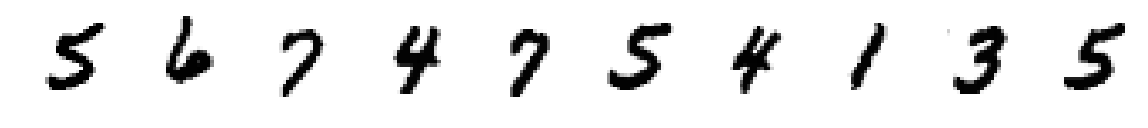

In [20]:
test_mnist()

## Kerasでバックプロパゲーションの実装とMNISTのテスト

In [0]:
model = Sequential()
model.add(Dense(200, input_dim=784)) # 28x28
model.add(Activation("tanh"))
model.add(Dense(100))
model.add(Activation("tanh"))
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train.reshape(60000, 784), Y_train,
                    validation_data=(X_test.reshape(10000, 784), Y_test),
                    batch_size=100, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0485 - acc: 0.7944 - val_loss: 0.0468 - val_acc: 0.8124
Epoch 2/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0467 - acc: 0.8035 - val_loss: 0.0451 - val_acc: 0.8213
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0451 - acc: 0.8116 - val_loss: 0.0435 - val_acc: 0.8285
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0436 - acc: 0.8188 - val_loss: 0.0421 - val_acc: 0.8331
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.0422 - acc: 0.8250 - val_loss: 0.0408 - val_acc: 0.8380


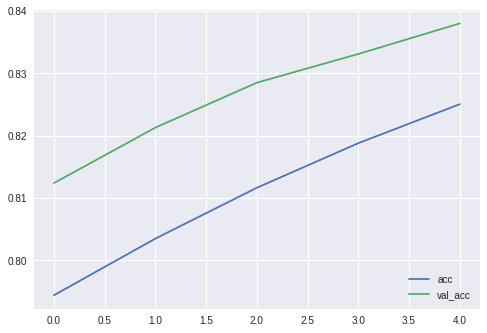

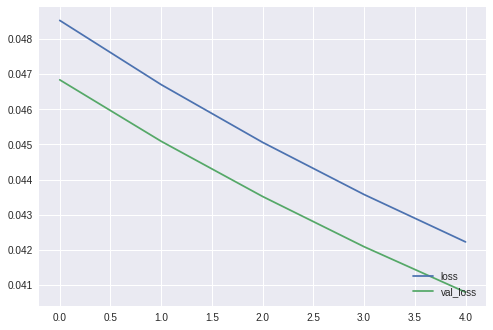

In [30]:
plot_history(history)

[1 7 0 4 9 6 5 9 1 7]
[1 7 0 0 4 6 3 4 1 4]


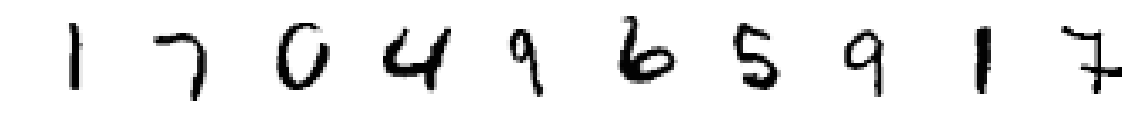

In [26]:
test_mnist()

In [0]:
model = Sequential()
model.add(Dense(200, input_dim=784)) # 28x28
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [0]:
model.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [45]:
history = model.fit(X_train.reshape(60000, 784), Y_train,
                    validation_data=(X_test.reshape(10000, 784), Y_test),
                    batch_size=100, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.2432 - acc: 0.4191 - val_loss: 0.1951 - val_acc: 0.6412
Epoch 2/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.1696 - acc: 0.6885 - val_loss: 0.1441 - val_acc: 0.7551
Epoch 3/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.1266 - acc: 0.7603 - val_loss: 0.1076 - val_acc: 0.8021
Epoch 4/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.0953 - acc: 0.7973 - val_loss: 0.0806 - val_acc: 0.8305
Epoch 5/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0728 - acc: 0.8231 - val_loss: 0.0620 - val_acc: 0.8496


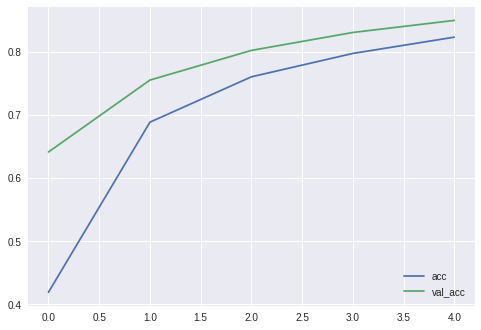

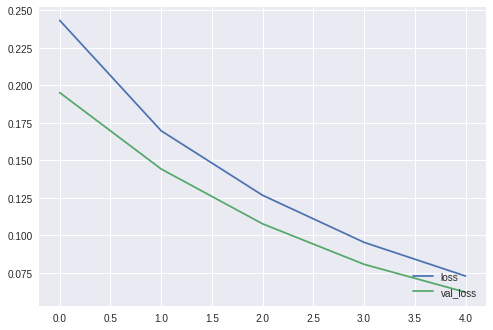

In [46]:
plot_history(history)

[9 5 7 5 1 8 6 9 0 4]
[9 3 7 5 1 8 6 9 0 4]


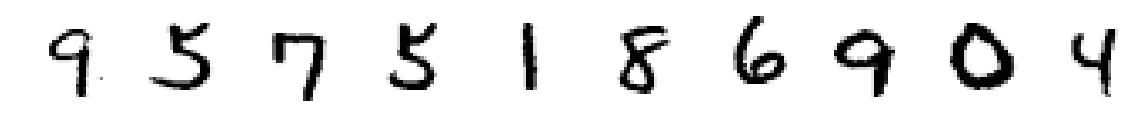

In [47]:
test_mnist()

In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
history = model.fit(X_train.reshape(60000, 784), Y_train,
                    validation_data=(X_test.reshape(10000, 784), Y_test),
                    batch_size=1000, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 32us/step - loss: 1.4318 - acc: 0.7943 - val_loss: 1.0809 - val_acc: 0.8464
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.9231 - acc: 0.8371 - val_loss: 0.5991 - val_acc: 0.8293
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.5279 - acc: 0.8689 - val_loss: 0.3007 - val_acc: 0.9056
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.2576 - acc: 0.9332 - val_loss: 0.1821 - val_acc: 0.9465
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.1392 - acc: 0.9644 - val_loss: 0.1251 - val_acc: 0.9642


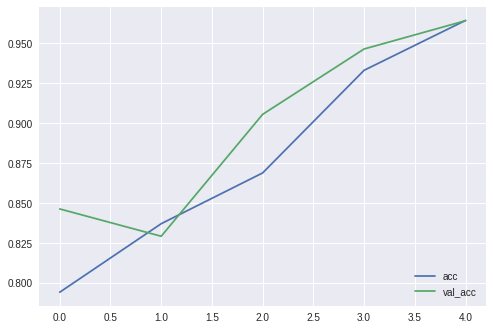

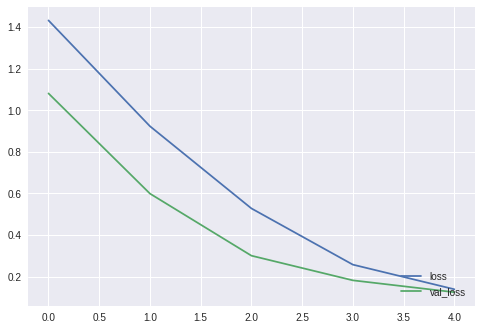

In [58]:
plot_history(history)

[7 4 0 4 0 1 7 9 5 1]
[7 4 0 4 0 1 7 9 5 1]


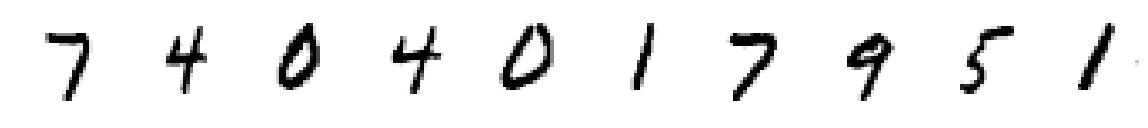

In [51]:
test_mnist()

## Kerasで小さなCNNの実装とMNISTのテスト

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [32]:
model = Sequential()

model.add(Convolution2D(20, 3, 3, border_mode='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(40, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), input_shape=(28, 28, 1..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), padding="same")`
  if __name__ == '__main__':


In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 40)        7240      
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 40)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 40)        160       
__________

In [48]:
history = model.fit(X_train.reshape(60000, 28, 28, 1), Y_train,
                    validation_data=(X_test.reshape(10000, 28, 28, 1), Y_test),
                    batch_size=1000, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2445 - acc: 0.9125 - val_loss: 0.3161 - val_acc: 0.8864
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.2307 - acc: 0.9174 - val_loss: 0.2844 - val_acc: 0.8968
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2195 - acc: 0.9213 - val_loss: 0.2878 - val_acc: 0.8969
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2103 - acc: 0.9249 - val_loss: 0.3256 - val_acc: 0.8829
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2013 - acc: 0.9280 - val_loss: 0.2779 - val_acc: 0.9018


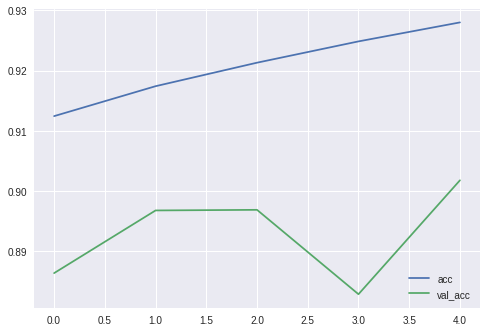

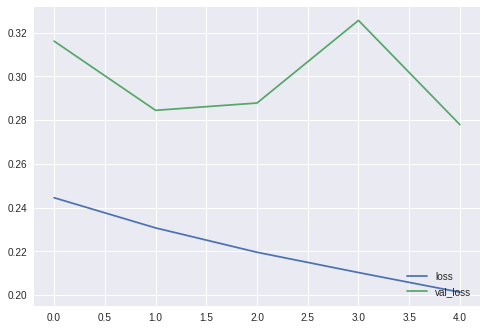

In [49]:
plot_history(history)

In [0]:
def test_mnist_cnn():
    test_num = 10
    start = np.random.randint(X_test.shape[0] - test_num)
    x_test = X_test[start:start+test_num]
    y_test = Y_test[start:start+test_num]

    fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
    for i in range(10):
        image = x_test[i]
        two_d = (np.reshape(image, (28, 28)) * 255).astype(np.uint8)
        subplts[i].axis('off')
        subplts[i].imshow(two_d, interpolation='nearest')

    print(np.argmax(y_test, axis=1))

    preds = model.predict(x_test.reshape(test_num,28,28,1))
    print(np.argmax(preds, axis=1))

[8 5 0 7 1 1 0 1 1 4]
[8 5 0 7 1 1 0 1 1 4]


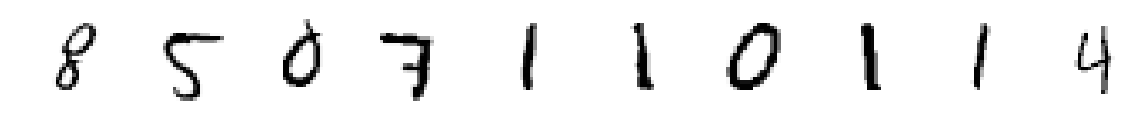

In [41]:
test_mnist_cnn()

In [0]:
from sklearn.preprocessing import MinMaxScaler

# http://aidiary.hatenablog.com/entry/20161120/1479640534
def visualize_filter(model):
    W = model.layers[0].get_weights()[0]
    # (nb_filter, nb_channel, nb_row, nb_col)
    W = W.transpose(3, 2, 0, 1)
    (nb_filter, nb_channel, nb_row, nb_col) = W.shape

    plt.figure()
    for i in range(nb_filter):
        im = W[i, 0]
        scaler = MinMaxScaler(feature_range=(0, 255))
        im = scaler.fit_transform(im)

        plt.subplot(4, 8, i + 1)
        plt.axis('off')
        plt.imshow(im, cmap="gray")
    plt.show()

In [0]:
visualize_filter(model)

## fashion_mnistでテスト

In [42]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

0 	Tシャツ/トップス  
1 	ズボン  
2 	プルオーバー  
3 	ドレス  
4 	コート  
5 	サンダル  
6 	シャツ  
7 	スニーカー  
8 	バッグ  
9 	アンクルブーツ  

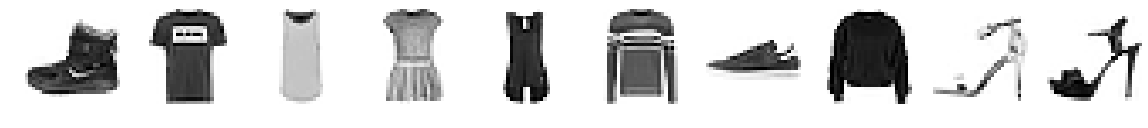

In [44]:
print_mnist_image(X_train)

## Kerasで小さなCNNでCIFAR10のテスト

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [22]:
model = Sequential()

model.add(Convolution2D(20, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(40, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        560       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 20)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 40)        7240      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 40)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 40)        160       
__________

In [17]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=1000, epochs=5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 173s 3ms/step - loss: 1.3358 - acc: 0.5290 - val_loss: 1.4019 - val_acc: 0.4981
Epoch 2/5
18000/50000 [=========>....................] - ETA: 1:44 - loss: 1.2372 - acc: 0.5644

KeyboardInterrupt: ignored

In [0]:
plot_history(history)

In [0]:
def test_cifar10():
    test_num = 10
    start = np.random.randint(X_test.shape[0] - test_num)
    x_test = X_test[start:start+test_num]
    y_test = Y_test[start:start+test_num]

    fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
    for i in range(10):
        image = x_test[i]
        two_d = (np.reshape(image, (32, 32, 3)) * 255).astype(np.uint8)
        subplts[i].axis('off')
        subplts[i].imshow(two_d, interpolation='nearest')

    print(np.argmax(y_test, axis=1))

    preds = model.predict(x_test)
    print(np.argmax(preds, axis=1))

In [0]:
test_cifar10()
# 0:airplane, 1:automobile, 2:bird, 3:cat, 4:deer, 5:dog, 6:frog, 7:horse, 8:ship, 9:truck

In [0]:
def visualize_filter_color(model):
    W = model.layers[0].get_weights()[0]
    # (nb_filter, nb_channel, nb_row, nb_col)
    W = W.transpose(3, 2, 0, 1)
    (nb_filter, nb_channel, nb_row, nb_col) = W.shape

    plt.figure()
    rgb_hash = {0: "Reds", 1: "Greens", 2: "Blues"}
    for rgb in range(3):
        for i in range(nb_filter):
            im = W[i, rgb]
            scaler = MinMaxScaler(feature_range=(0, 255))
            im = scaler.fit_transform(im)

            plt.subplot(40*3//10, 10, rgb*40 + i + 1)
            plt.axis('off')
            plt.imshow(im, cmap=rgb_hash[rgb])
    plt.show()

In [0]:
visualize_filter_color(model)

## 重みデータのsave/load

In [0]:
model.save_weights("cifar10_model_weights.h5")

In [0]:
model.load_weights("cifar10_model_weights.h5")

## もっと大きなCNNでテスト

In [0]:
from keras.layers import Conv2D

In [0]:
model = Sequential()

model.add(Conv2D(256, 3, padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2))

model.add(Conv2D(384, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2))

model.add(Conv2D(384, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2))

model.add(Conv2D(384, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(384, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 384)       885120    
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 384)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 384)       1536      
__________

In [22]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=100, epochs=5)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5


TypeError: ignored

# Fashion MNIST GPU test

In [0]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       6656      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)       1638656   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 256)         0         
__________

In [54]:
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, x_train.shape[0] - batch_size)
    yield x_train[offset:offset+batch_size], y_train[offset:offset + batch_size]
    

model.fit_generator(
    train_gen(10240),
    epochs=2,
    steps_per_epoch=10,
    validation_data=(x_test, y_test),
)

Epoch 1/2


ResourceExhaustedError: ignored

In [5]:
model.fit_generator(
    train_gen(10240),
    epochs=10,
    steps_per_epoch=10,
    validation_data=(x_test, y_test),
)

Epoch 1/10
10/10 [==============================] - 43s 4s/step - loss: 0.2722 - sparse_categorical_accuracy: 0.9013 - val_loss: 0.7446 - val_sparse_categorical_accuracy: 0.7652
Epoch 2/10
10/10 [==============================] - 43s 4s/step - loss: 0.2502 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.6910 - val_sparse_categorical_accuracy: 0.7432
Epoch 3/10
10/10 [==============================] - 43s 4s/step - loss: 0.2402 - sparse_categorical_accuracy: 0.9136 - val_loss: 0.7472 - val_sparse_categorical_accuracy: 0.7441
Epoch 4/10
10/10 [==============================] - 43s 4s/step - loss: 0.2392 - sparse_categorical_accuracy: 0.9142 - val_loss: 0.7397 - val_sparse_categorical_accuracy: 0.7243
Epoch 5/10
10/10 [==============================] - 43s 4s/step - loss: 0.2142 - sparse_categorical_accuracy: 0.9216 - val_loss: 0.5922 - val_sparse_categorical_accuracy: 0.7661
Epoch 6/10
10/10 [==============================] - 43s 4s/step - loss: 0.2186 - sparse_categorical_accuracy: 

In [0]:
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']


from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  f, axes = pyplot.subplots(nc, 4)
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    axes[x, y].text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(x_test[:16]), 
                 model.predict(x_test[:16]))
